<a href="https://colab.research.google.com/github/adamfagan/BP-Fagan-CNN-Huby/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import random
import pickle
import time
import PIL
import PIL.Image
import pathlib

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization, MaxPool2D
from tensorflow.keras.callbacks import TensorBoard

NAME = "edible-vs-poisonous-cnn-64x2-{}".format(int(time.time()))
DATADIR = "/content/drive/MyDrive/Colab Notebooks/dataset2"
CATEGORIES = ["Boletus reticulatus (Dubák)", "Amanita muscaria (Muchotrávka)"]

tensorboard = TensorBoard(log_dir='logs/{}'.format(NAME))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_dir = "/content/drive/MyDrive/Colab Notebooks/dataset2"
data_dir = pathlib.Path(data_dir)

In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

667


In [ ]:
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 843 files belonging to 2 classes.
Using 675 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 843 files belonging to 2 classes.
Using 168 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['edible', 'poisonous']


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
model = Sequential()

#model.add(tf.keras.layers.Rescaling(1./255))
# model.add(Conv2D(128, (3,3), input_shape=X.shape[1:]))
# model.add(Conv2D(128, (3,3), input_shape=[300, 300, 3]))
model.add(Conv2D(128, (3,3)))

model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(256, (3,3)))  #
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(256, (3,3)))  #
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(256))
model.add(Activation('relu'))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

#model.fit(X, y, batch_size=32, epochs=5, validation_split=0.1, callbacks=[tensorboard])
model.fit(train_ds, validation_data=val_ds, epochs=50, callbacks=[tensorboard])
model.summary()

ValueError: ignored

In [ ]:
model = Sequential()

model.add(Conv2D(input_shape=(180,180,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(1, activation="sigmoid"))

opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss=tf.keras.losses.categorical_crossentropy, metrics=['accuracy'])

model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_206 (Conv2D)          (None, 180, 180, 64)      1792      
_________________________________________________________________
conv2d_207 (Conv2D)          (None, 180, 180, 64)      36928     
_________________________________________________________________
max_pooling2d_84 (MaxPooling (None, 90, 90, 64)        0         
_________________________________________________________________
conv2d_208 (Conv2D)          (None, 90, 90, 128)       73856     
_________________________________________________________________
conv2d_209 (Conv2D)          (None, 90, 90, 128)       147584    
_________________________________________________________________
max_pooling2d_85 (MaxPooling (None, 45, 45, 128)       0         
_________________________________________________________________
conv2d_210 (Conv2D)          (None, 45, 45, 256)     

In [ ]:
model.fit(train_ds, validation_data=val_ds, epochs=50)

Epoch 1/50
22/22 [==============================] - 14s 596ms/step - loss: nan - accuracy: 0.5096 - val_loss: nan - val_accuracy: 0.5655
Epoch 2/50
22/22 [==============================] - 12s 551ms/step - loss: nan - accuracy: 0.5067 - val_loss: nan - val_accuracy: 0.5655
Epoch 3/50
22/22 [==============================] - 12s 552ms/step - loss: nan - accuracy: 0.5067 - val_loss: nan - val_accuracy: 0.5655
Epoch 4/50
22/22 [==============================] - 12s 552ms/step - loss: nan - accuracy: 0.5067 - val_loss: nan - val_accuracy: 0.5655
Epoch 5/50
 6/22 [=======>......................] - ETA: 8s - loss: nan - accuracy: 0.5208

KeyboardInterrupt: ignored

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/models/model_3_vs_3_50epochs_98acc_79valacc')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/models/model_3_vs_3_50epochs_98acc_79valacc/assets


In [ ]:
model_loaded = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/models/model_3_vs_3_50epochs_98acc_79valacc')

# Check its architecture
model_loaded.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 178, 178, 128)     3584      
_________________________________________________________________
activation (Activation)      (None, 178, 178, 128)     0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 89, 89, 128)       0         
_________________________________________________________________
batch_normalization (BatchNo (None, 89, 89, 128)       512       
_________________________________________________________________
dropout (Dropout)            (None, 89, 89, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 87, 87, 256)       295168    
_________________________________________________________________
activation_1 (Activation)    (None, 87, 87, 256)       0

Prediction: 1.0
This image most likely belongs to: poisonous


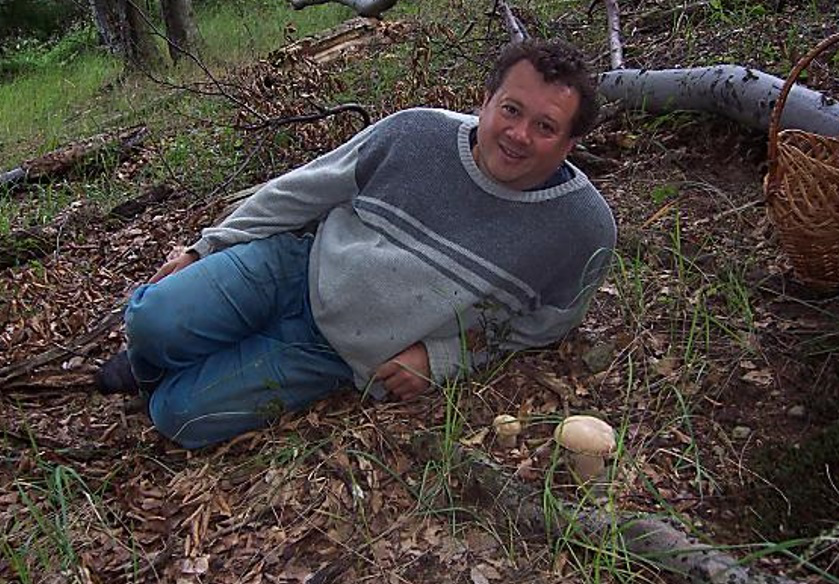

In [ ]:
import pathlib
#data_dir = "/content/drive/MyDrive/Colab Notebooks/tests/EKV2017-9217335_rJPOFaLoW.JPG" # muchotravka
#data_dir = "/content/drive/MyDrive/Colab Notebooks/tests/EKV2017-9219519_H1Rkpasj-.JPG" # muchotravka
#data_dir = "/content/drive/MyDrive/Colab Notebooks/tests/CUV2017-9224390_BJDKFy_hb.JPG" # muchotravka

#data_dir = "/content/drive/MyDrive/Colab Notebooks/tests/ARO2015-9190406_B1W-7TQRl.JPG" # dub
#data_dir = "/content/drive/MyDrive/Colab Notebooks/tests/FDE2014PIC60764313.JPG" #dub
#data_dir = "/content/drive/MyDrive/Colab Notebooks/tests/APE2017-9196671_rk6iCYUEZ.JPG" # dub

#data_dir = "/content/drive/MyDrive/Colab Notebooks/tests/Amanita_phalloides_test1.jpg" # muchotravka zelena
#data_dir = "/content/drive/MyDrive/Colab Notebooks/tests/Cantharellus_cibarius_test1.jpg" # kuriatko jedle

image_path = pathlib.Path(data_dir)

img= tf.keras.utils.load_img(
    image_path, target_size=(img_height, img_width)
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model_loaded.predict(img_array)
score = tf.nn.softmax(predictions[0])

index = 1
if(predictions[0][0] < 0.5):
    index = 0

print('Prediction:', predictions[0][0])
print(
    "This image most likely belongs to: {}"
    .format(class_names[index])
)

PIL.Image.open(str(data_dir))